<a href="https://colab.research.google.com/github/swami-gait/Foundations_of_datascience/blob/master/FDS_WK11_DataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Tabulation of Covid data

In [2]:
url = 'https://api.covid19india.org/states_daily.json'

In [3]:
import urllib.request

In [4]:
urllib.request.urlretrieve(url,'data.json');

In [5]:
covid_data = pd.read_json('data.json')

In [6]:
covid_data.info

<bound method DataFrame.info of                                           states_daily
0    {'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...
1    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
2    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
3    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
4    {'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...
..                                                 ...
448  {'an': '61', 'ap': '6924', 'ar': '110', 'as': ...
449  {'an': '0', 'ap': '80', 'ar': '0', 'as': '6', ...
450  {'an': '139', 'ap': '9024', 'ar': '96', 'as': ...
451  {'an': '40', 'ap': '9113', 'ar': '42', 'as': '...
452  {'an': '1', 'ap': '87', 'ar': '0', 'as': '4', ...

[453 rows x 1 columns]>

In [7]:
import json

In [ ]:
with open('data.json') as f:
    data = json.load(f)
data

In [9]:
data = data['states_daily']

In [10]:
covid_data = pd.json_normalize(data)

In [ ]:
covid_data.info()

In [12]:
df = covid_data

In [13]:
df.date = pd.to_datetime(df.date)

In [14]:
df =df[df.status=='Confirmed']

In [15]:
df.drop('status',axis=1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df.set_index('date',inplace=True)

In [17]:
df

an     ap   ar    as    br  ch  ...   tr     tt un    up   ut    wb
date                                         ...                                
2020-03-14    0      1    0     0     0   0  ...    0     81  0    12    0     0
2020-03-15    0      0    0     0     0   0  ...    0     27  0     1    0     0
2020-03-16    0      0    0     0     0   0  ...    0     15  0     0    1     0
2020-03-17    0      0    0     0     0   0  ...    0     11  0     2    0     1
2020-03-18    0      0    0     0     0   0  ...    0     37  0     2    1     0
...         ...    ...  ...   ...   ...  ..  ...  ...    ... ..   ...  ...   ...
2020-08-07   99  10171  101  2679  3646  47  ...  128  61455  0  4404  278  2912
2020-08-08  129  10080   68  2218  3992  52  ...  146  65156  0  4660  501  2949
2020-08-09  139  10820   38  1123  3934  89  ...  147  62117  0  4571  230  2939
2020-08-10  135   7665   76  2900  3021  80  ...   62  53016  0  4113  389  2905
2020-08-11  139   9024   96  2669  4071  75  ...  164  61252  0  5041  411  2931

[151 rows x 39 columns]

In [ ]:
df.info()

In [19]:
df =df.apply(pd.to_numeric)

In [ ]:
df.info()

In [21]:
df.tail(7)

an     ap   ar    as    br  ch  ...   tr     tt  un    up   ut    wb
date                                         ...                                 
2020-08-05   99  10128   65  2284  2701  64  ...  122  56626   0  4078  246  2816
2020-08-06   96  10328   93  2372  3416  57  ...   98  62170   0  4586  369  2954
2020-08-07   99  10171  101  2679  3646  47  ...  128  61455   0  4404  278  2912
2020-08-08  129  10080   68  2218  3992  52  ...  146  65156   0  4660  501  2949
2020-08-09  139  10820   38  1123  3934  89  ...  147  62117   0  4571  230  2939
2020-08-10  135   7665   76  2900  3021  80  ...   62  53016   0  4113  389  2905
2020-08-11  139   9024   96  2669  4071  75  ...  164  61252   0  5041  411  2931

[7 rows x 39 columns]

In [22]:
df =df.tail(7)

In [23]:
df.style

In [24]:
def colour_red_negative(x):
    color = 'red'if x<0 else'white'
    return 'color:'+ color

In [25]:
df.style.applymap(colour_red_negative)

In [26]:
df.style.highlight_max(color='red').highlight_min(color='green')

In [27]:
df.drop(['dd','ld','un'],axis=1,inplace=True)

In [28]:
df.drop(['tt'],axis=1,inplace=True)

In [29]:
df.style.highlight_max(color='red').highlight_min(color='green')

In [30]:
def bold_max_value(x):
    is_max = (x==x.max())
    return ['font-weight:bold' if y else '' for y in is_max]

In [31]:
df.style.apply(bold_max_value).highlight_min(color='green')

In [32]:
df.style.apply(bold_max_value).highlight_max(color='red',axis=1)

In [33]:
df.style.background_gradient(cmap='Reds')

In [34]:
df.style.background_gradient(cmap='Reds',axis=1)

In [35]:
df.style.background_gradient(cmap='Reds',subset=['mh','tn','dl','ap','ka'])

In [36]:
df.style.bar()

In [37]:
df.style.bar(['mh','tn','ap','dl','ka'])

In [38]:
df[['mh','tn','dl','ka','ap']].style.bar()

In [39]:
df[['mh','tn','dl','ka','ap']].style.bar(subset=['mh'],color='red').bar(subset=['tn'],color='orange').bar(subset=['dl'],color='yellow').bar(subset=['ka'],color='brown').bar(subset=['ap'],color='maroon')

In [40]:
x =np.random.normal(size=1000)

### Distribution of data

#### Distplot

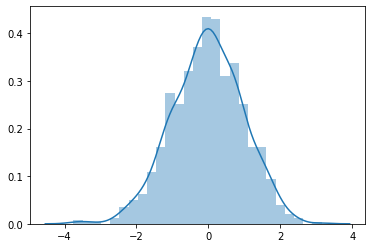

In [41]:
sns.distplot(x);

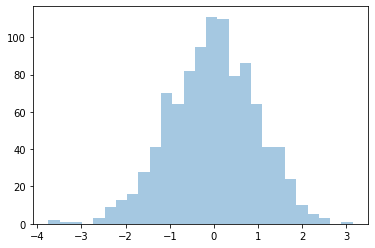

In [42]:
sns.distplot(x,kde=False);

In [43]:
sns.set(color_codes=True)

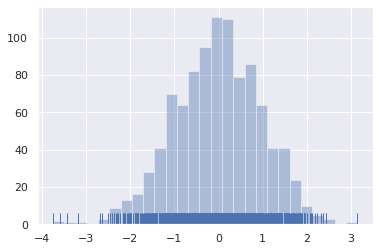

In [44]:
sns.distplot(x,kde=False,rug=True);

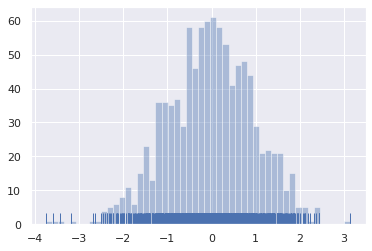

In [45]:
sns.distplot(x,kde=False,rug=True,bins=50);

#### KDE Plot

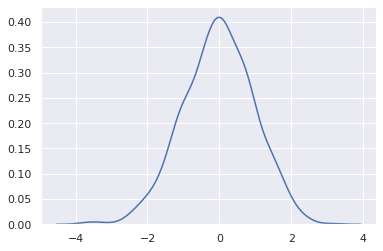

In [46]:
sns.kdeplot(x);

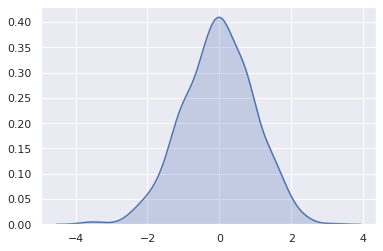

In [47]:
sns.kdeplot(x,shade=True);

In [48]:
y= np.random.uniform(size=1000)

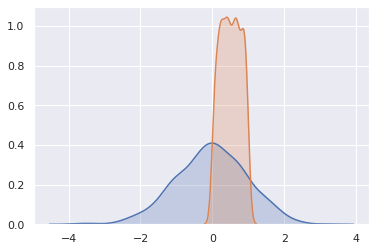

In [49]:
sns.kdeplot(x,shade=True)
sns.kdeplot(y,shade=True);

In [50]:
d=sns.load_dataset('diamonds')

In [51]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [52]:
d

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

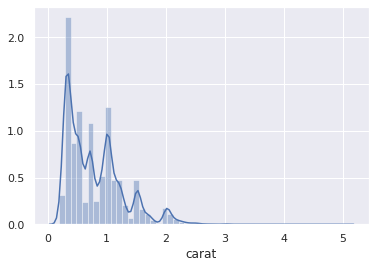

In [53]:
sns.distplot(d.carat);

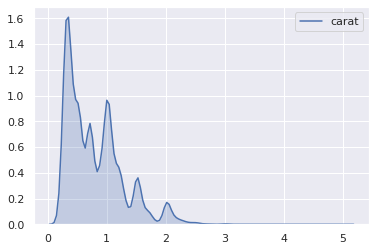

In [54]:
sns.kdeplot(d.carat,shade=True)

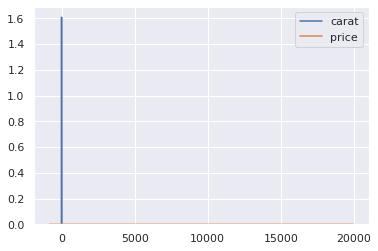

In [55]:
sns.kdeplot(d.carat,shade=True)
sns.kdeplot(d.price,shade=True);

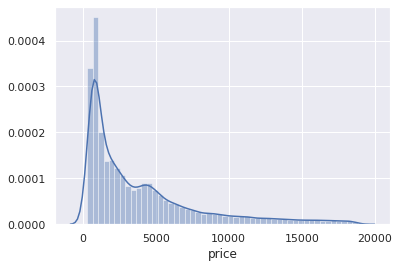

In [56]:
sns.distplot(d.price)

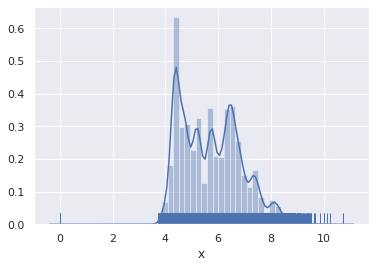

In [57]:
sns.distplot(d.x,rug=True);

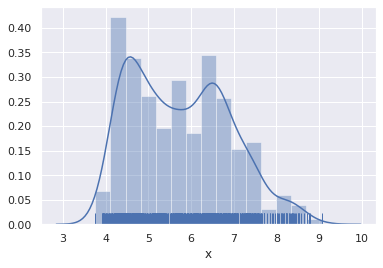

In [58]:
sns.distplot(d.sample(1000).x,rug=True);

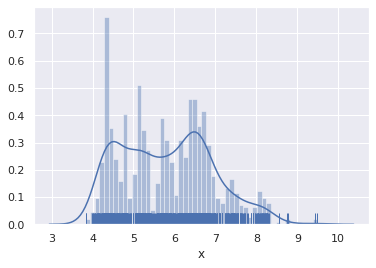

In [59]:
sns.distplot(d.sample(1000).x,rug=True,bins=50);

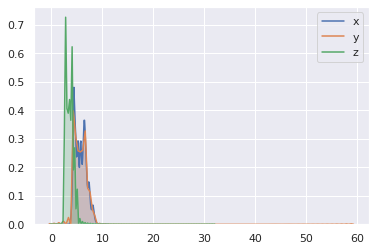

In [60]:
sns.kdeplot(d.x,shade=True)
sns.kdeplot(d.y,shade=True)
sns.kdeplot(d.z,shade=True);

#### Boxplot

In [61]:
x=np.random.normal(size=1000)

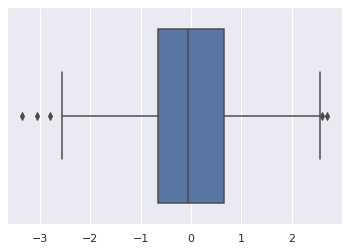

In [62]:
sns.boxplot(x);

In [63]:
x=np.random.uniform(size=1000)

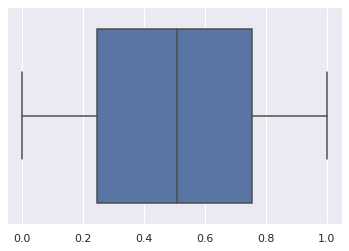

In [64]:
sns.boxplot(x);

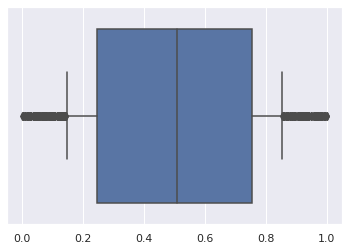

In [65]:
sns.boxplot(x,whis=0.2);

In [66]:
x=np.random.normal(size=1000)

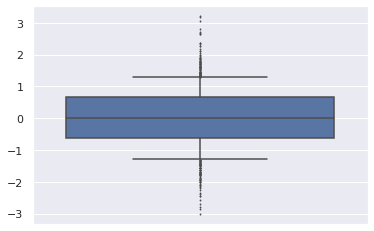

In [67]:
sns.boxplot(x,whis=0.5,fliersize=1,orient='v');

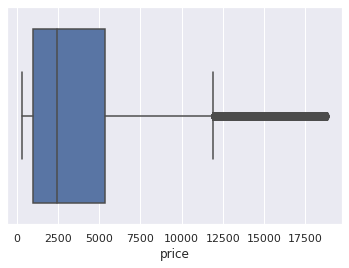

In [68]:
sns.boxplot(d.price)

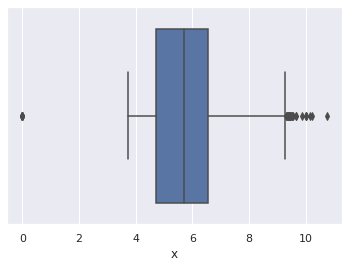

In [69]:
sns.boxplot(d.x);

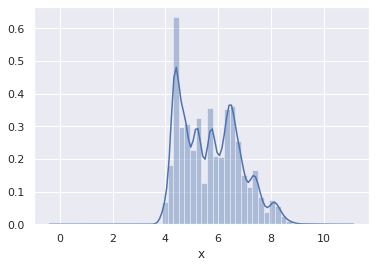

In [70]:
sns.distplot(d.x)

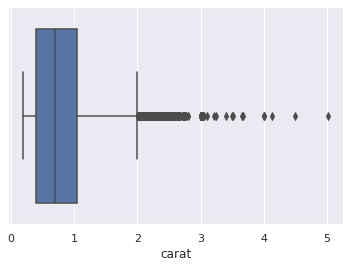

In [71]:
sns.boxplot(d.carat);

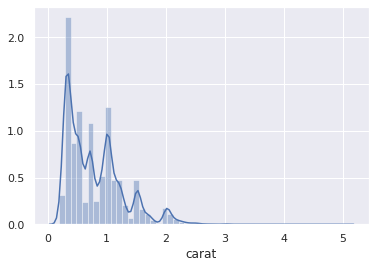

In [72]:
sns.distplot(d.carat);

In [73]:
d.groupby('cut').count()

carat  color  clarity  depth  table  price      x      y      z
cut                                                                       
Fair        1610   1610     1610   1610   1610   1610   1610   1610   1610
Good        4906   4906     4906   4906   4906   4906   4906   4906   4906
Ideal      21551  21551    21551  21551  21551  21551  21551  21551  21551
Premium    13791  13791    13791  13791  13791  13791  13791  13791  13791
Very Good  12082  12082    12082  12082  12082  12082  12082  12082  12082

#### Bar plot

In [74]:
c = d.groupby('cut')['cut'].count()

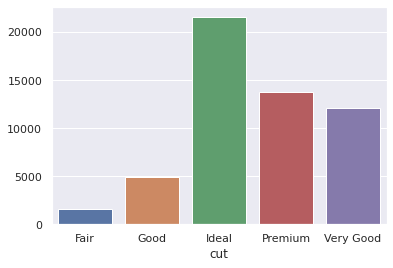

In [75]:
sns.barplot(c.index,c.values);

In [76]:
clare = d.groupby('clarity')['clarity'].count()

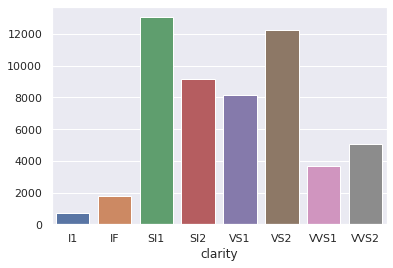

In [77]:
sns.barplot(clare.index,clare.values);

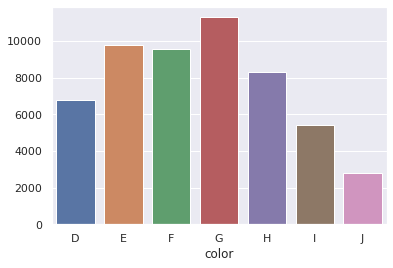

In [78]:
col = d.groupby('color')['color'].count()
sns.barplot(col.index,col.values);

#### Joint Plot

In [79]:
x=np.random.normal(size=1000)
y=np.random.normal(size=1000)

In [80]:
df = pd.DataFrame({'x':x,'y':y})

In [81]:
df

x         y
0   -0.551617  0.415154
1    0.693064  0.635671
2   -1.324042 -0.132741
3    0.877823  1.077744
4    0.041104  1.479390
..        ...       ...
995  0.383349 -0.817864
996  0.228803  0.039038
997 -0.649550  0.310240
998 -1.569822  1.506044
999 -0.039899 -1.524221

[1000 rows x 2 columns]

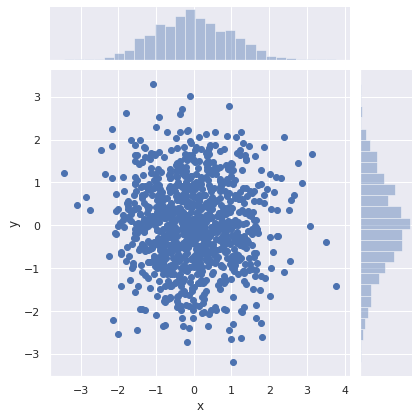

In [82]:
sns.jointplot('x','y',data=df);

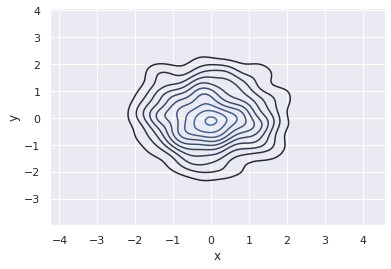

In [83]:
sns.kdeplot(df.x,df.y)

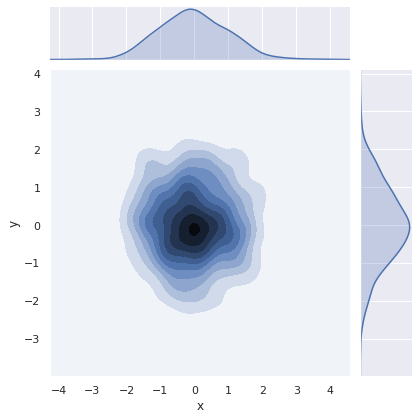

In [84]:
sns.jointplot('x','y',data=df,kind='kde');

In [85]:
x=np.random.normal(size=1000)
y=(3*x)+(np.random.normal(size=1000)/5)

In [86]:
df1 = pd.DataFrame({'x':x,'y':y})

In [87]:
df1

x         y
0   -1.860233 -5.546128
1    0.205218  0.648263
2    0.411432  1.142250
3   -0.904786 -2.971706
4    0.379937  1.456746
..        ...       ...
995 -0.434621 -1.156083
996 -0.884711 -2.464876
997 -0.457673 -1.361169
998  2.098732  6.567747
999 -2.844174 -8.665730

[1000 rows x 2 columns]

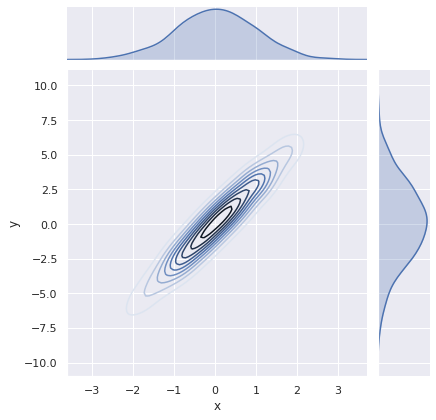

In [88]:
sns.jointplot('x','y',data=df1,kind='kde',shade=False);

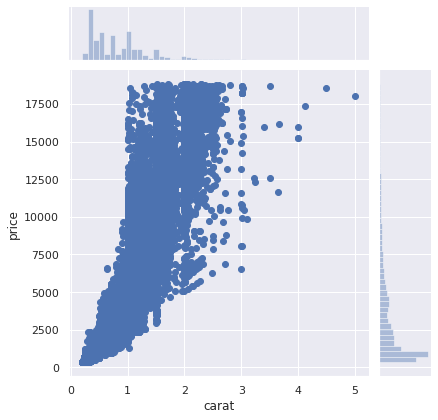

In [89]:
sns.jointplot('carat','price',data=d)

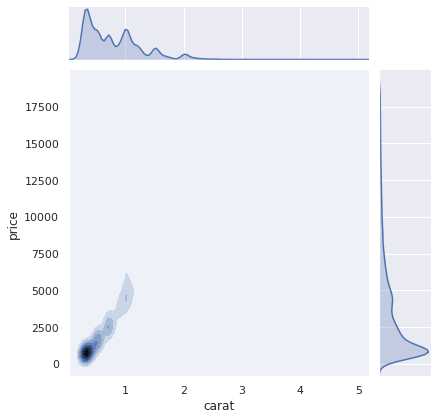

In [90]:
sns.jointplot('carat','price',data=d,kind='kde')

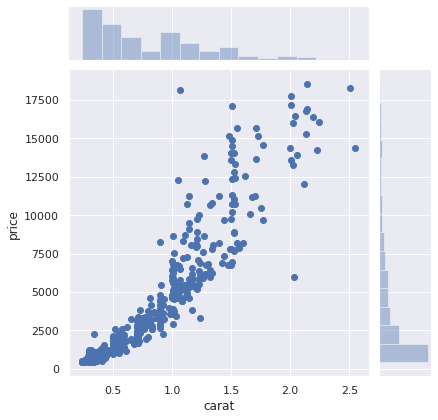

In [91]:
sns.jointplot('carat','price',data=d.sample(500));

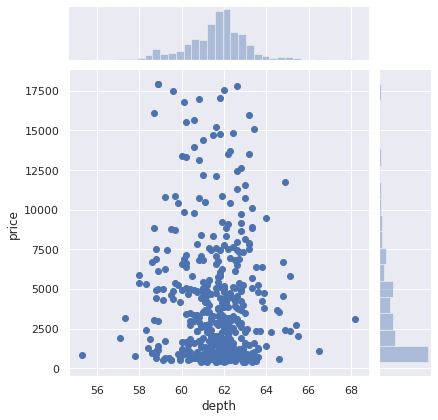

In [92]:
sns.jointplot('depth','price',data=d.sample(500));

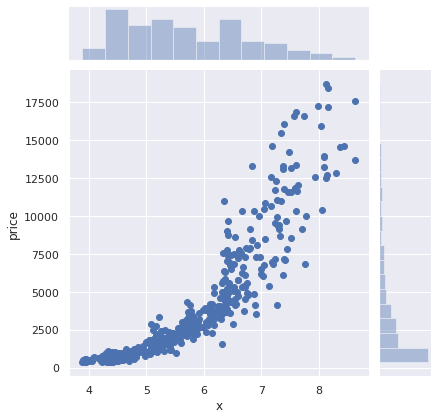

In [93]:
sns.jointplot('x','price',data=d.sample(500));

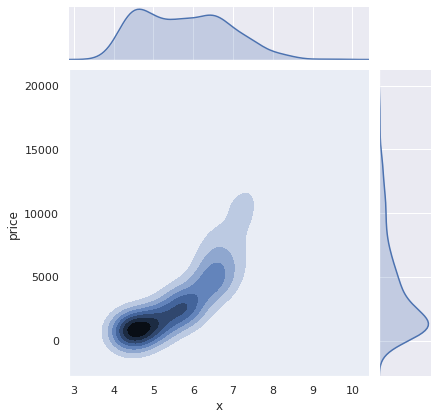

In [94]:
sns.jointplot('x','price',data=d.sample(500),kind='kde');

#### Swarm Plot

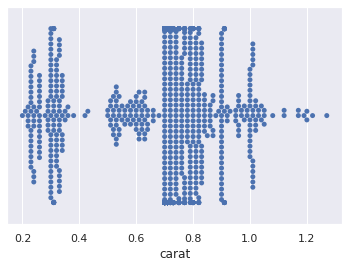

In [95]:
sns.swarmplot(d.head(1000).carat)

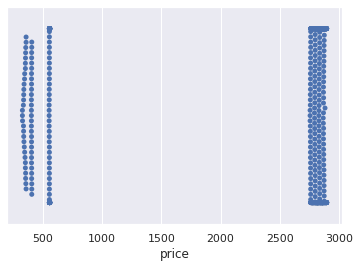

In [96]:
sns.swarmplot(d.head(1000).price)

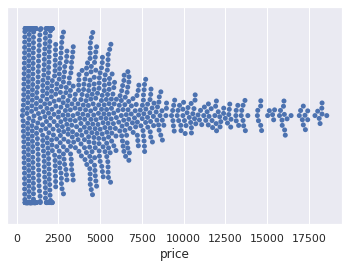

In [97]:
sns.swarmplot(d.sample(1000).price)

In [98]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


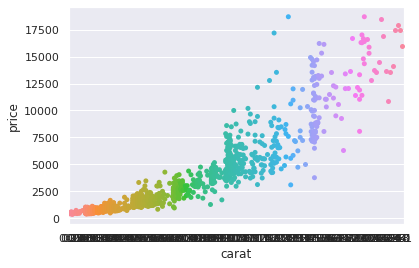

In [99]:
sns.swarmplot('carat','price',data =d.sample(1000));

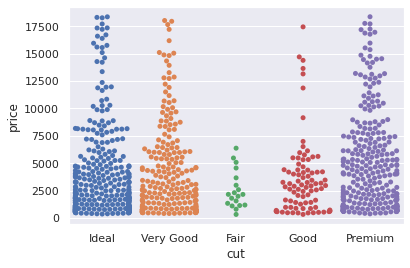

In [100]:
sns.swarmplot('cut','price',data =d.sample(1000));

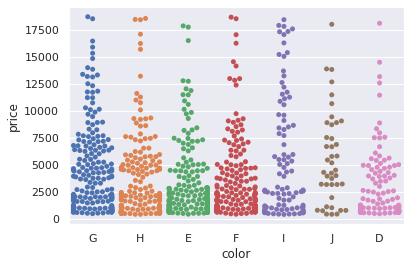

In [101]:
sns.swarmplot('color','price',data =d.sample(1000));

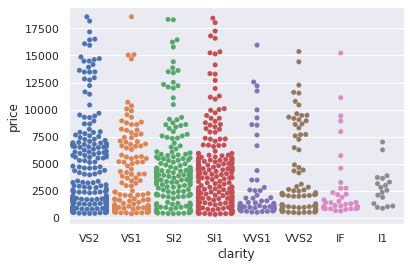

In [102]:
sns.swarmplot('clarity','price',data =d.sample(1000));

In [103]:
p=sns.load_dataset('penguins')

In [104]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [105]:
p

species     island  ...  body_mass_g     sex
0    Adelie  Torgersen  ...       3750.0    MALE
1    Adelie  Torgersen  ...       3800.0  FEMALE
2    Adelie  Torgersen  ...       3250.0  FEMALE
3    Adelie  Torgersen  ...          NaN     NaN
4    Adelie  Torgersen  ...       3450.0  FEMALE
..      ...        ...  ...          ...     ...
339  Gentoo     Biscoe  ...          NaN     NaN
340  Gentoo     Biscoe  ...       4850.0  FEMALE
341  Gentoo     Biscoe  ...       5750.0    MALE
342  Gentoo     Biscoe  ...       5200.0  FEMALE
343  Gentoo     Biscoe  ...       5400.0    MALE

[344 rows x 7 columns]

In [106]:
p.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


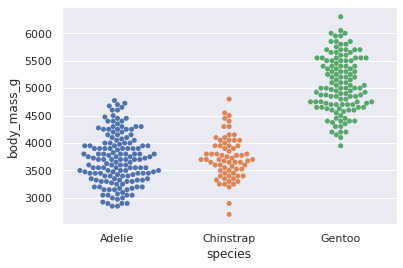

In [107]:
sns.swarmplot(x='species',y='body_mass_g',data=p)

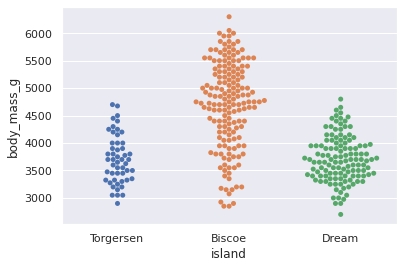

In [108]:
sns.swarmplot(x='island',y='body_mass_g',data=p)

###Violin plot

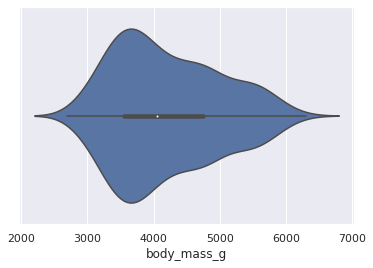

In [109]:
sns.violinplot(x='body_mass_g',data=p);

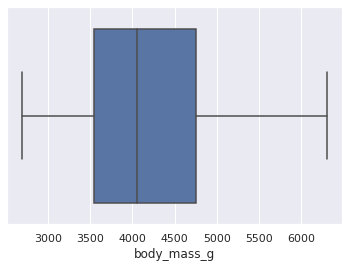

In [110]:
sns.boxplot(x='body_mass_g',data=p);

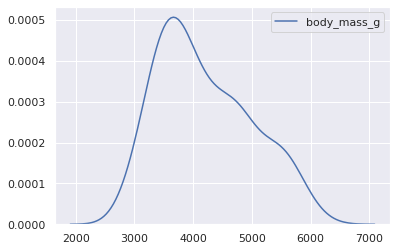

In [111]:
sns.kdeplot(p.body_mass_g);

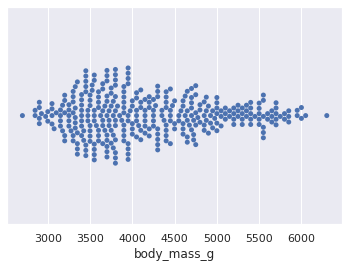

In [112]:
sns.swarmplot(x='body_mass_g',data=p);

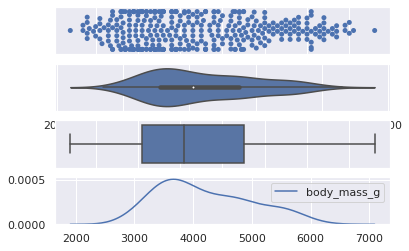

In [113]:
fig,axs=plt.subplots(nrows=4)
sns.swarmplot(x='body_mass_g',data=p,ax=axs[0]);
sns.violinplot(x='body_mass_g',data=p,ax=axs[1]);
sns.boxplot(x='body_mass_g',data=p,ax=axs[2]);
sns.kdeplot(p.body_mass_g,ax=axs[3]);

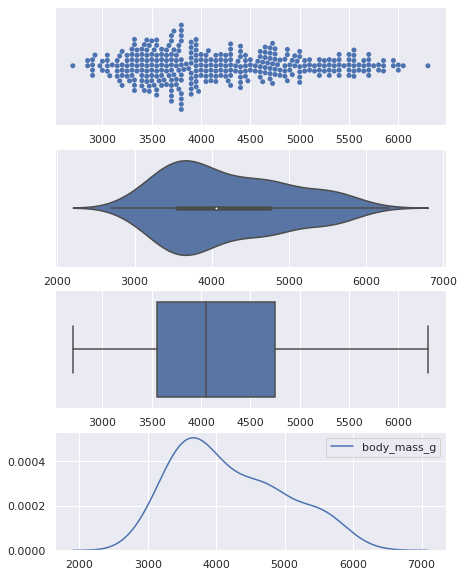

In [114]:
fig,axs=plt.subplots(nrows=4)
fig.set_size_inches(7,10)
sns.swarmplot(x='body_mass_g',data=p,ax=axs[0]);
sns.violinplot(x='body_mass_g',data=p,ax=axs[1]);
sns.boxplot(x='body_mass_g',data=p,ax=axs[2]);
sns.kdeplot(p.body_mass_g,ax=axs[3]);

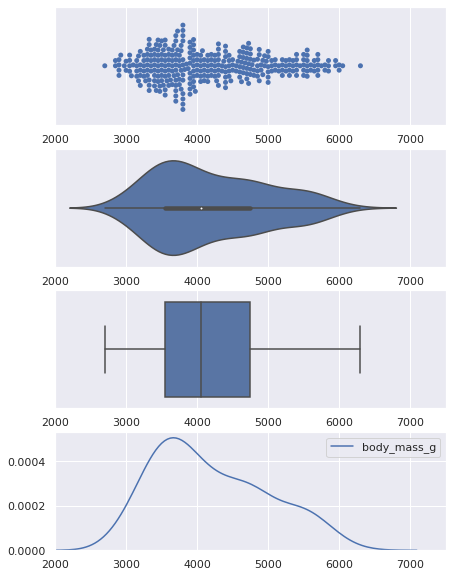

In [115]:
fig,axs=plt.subplots(nrows=4)
fig.set_size_inches(7,10)
p1=sns.swarmplot(x='body_mass_g',data=p,ax=axs[0]);
p1.set(xlim=(2000,7500));
p2=sns.violinplot(x='body_mass_g',data=p,ax=axs[1]);
p2.set(xlim=(2000,7500));
p3=sns.boxplot(x='body_mass_g',data=p,ax=axs[2]);
p3.set(xlim=(2000,7500));
p4=sns.kdeplot(p.body_mass_g,ax=axs[3]);
p4.set(xlim=(2000,7500));

In [116]:
'''fig,axs=plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(7,10)
p1=sns.swarmplot(x='body_mass_g',data=p,ax=axs[0]);
p1.set(xlim=(2000,7500));
p2=sns.violinplot(x='body_mass_g',data=p,ax=axs[1]);
p2.set(xlim=(2000,7500));
p3=sns.boxplot(x='body_mass_g',data=p,ax=axs[2]);
p3.set(xlim=(2000,7500));
p4=sns.kdeplot(p.body_mass_g,ax=axs[3]);
p4.set(xlim=(2000,7500));'''

"fig,axs=plt.subplots(nrows=4,ncols=2)\nfig.set_size_inches(7,10)\np1=sns.swarmplot(x='body_mass_g',data=p,ax=axs[0]);\np1.set(xlim=(2000,7500));\np2=sns.violinplot(x='body_mass_g',data=p,ax=axs[1]);\np2.set(xlim=(2000,7500));\np3=sns.boxplot(x='body_mass_g',data=p,ax=axs[2]);\np3.set(xlim=(2000,7500));\np4=sns.kdeplot(p.body_mass_g,ax=axs[3]);\np4.set(xlim=(2000,7500));"

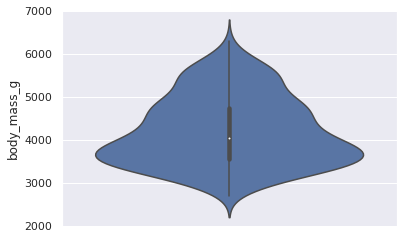

In [117]:
sns.violinplot(x='body_mass_g',data=p,orient='v');

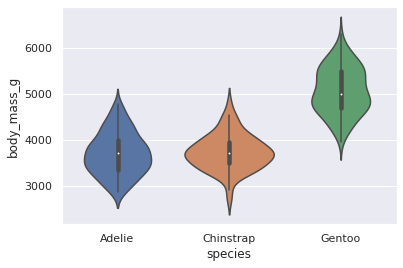

In [118]:
sns.violinplot(x='species',y='body_mass_g',data=p);

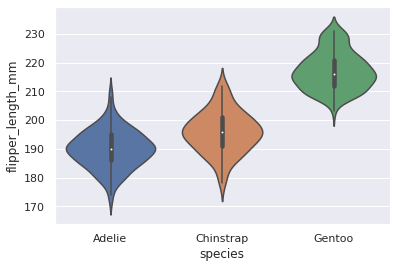

In [119]:
sns.violinplot(x='species',y='flipper_length_mm',data=p);

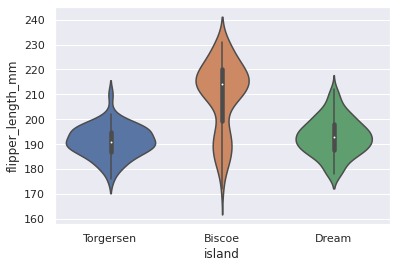

In [120]:
sns.violinplot(x='island',y='flipper_length_mm',data=p);

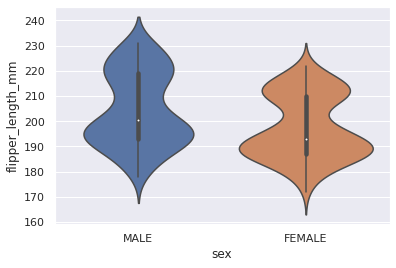

In [121]:
sns.violinplot(x='sex',y='flipper_length_mm',data=p);

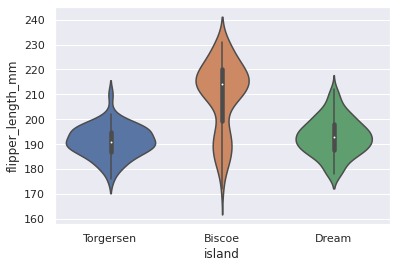

In [122]:
sns.violinplot(x='island',y='flipper_length_mm',data=p);

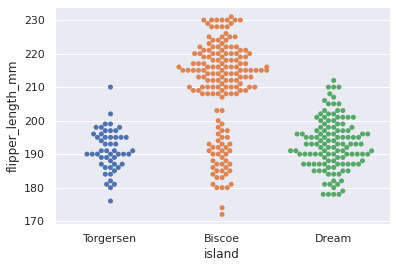

In [123]:
sns.swarmplot(x='island',y='flipper_length_mm',data=p);

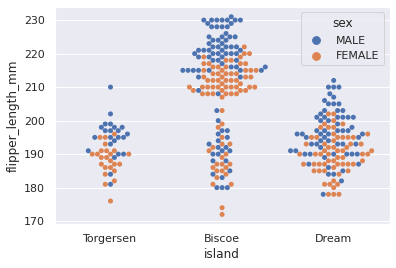

In [124]:
sns.swarmplot(x='island',y='flipper_length_mm',hue='sex',data=p);

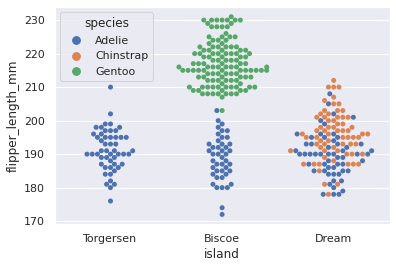

In [125]:
sns.swarmplot(x='island',y='flipper_length_mm',hue='species',data=p);

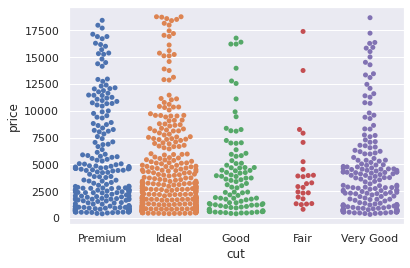

In [126]:
sns.swarmplot(x='cut',y='price',data=d.sample(1000));

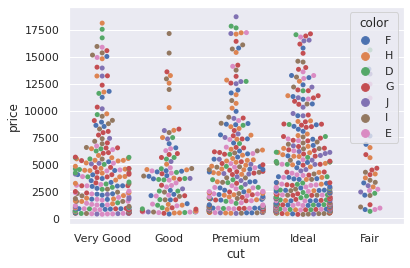

In [127]:
sns.swarmplot(x='cut',y='price',hue='color',data=d.sample(1000));

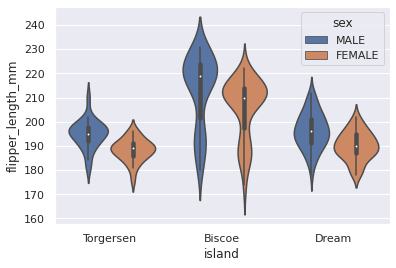

In [128]:
sns.violinplot(x='island',y='flipper_length_mm',hue='sex',data=p);

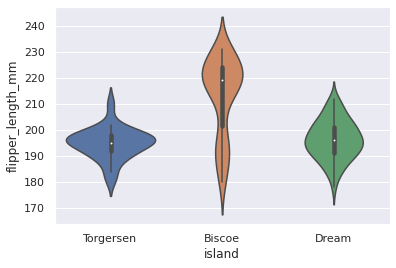

In [129]:
sns.violinplot(x='island',y='flipper_length_mm',data=p[p.sex=="MALE"]);

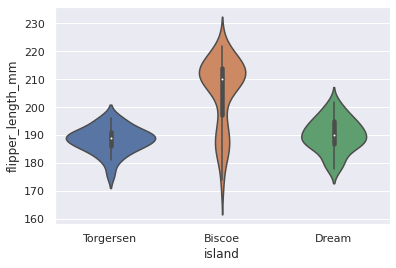

In [130]:
sns.violinplot(x='island',y='flipper_length_mm',data=p[p.sex=="FEMALE"]);

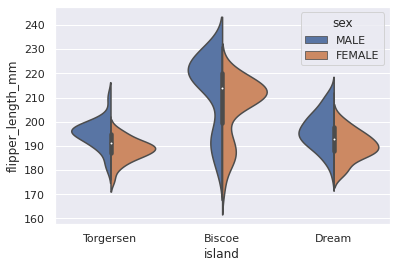

In [131]:
sns.violinplot(x='island',y='flipper_length_mm',hue='sex',split=True,data=p);

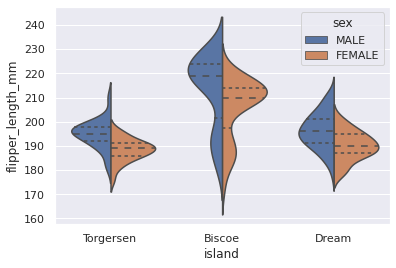

In [132]:
sns.violinplot(x='island',y='flipper_length_mm',hue='sex',split=True,inner='quartile',data=p);

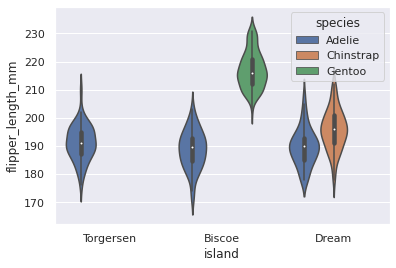

In [133]:
sns.violinplot(x='island',y='flipper_length_mm',hue='species',data=p);

In [134]:
p['binary_species']=p.species.apply(lambda x: 'Gentoo' if x=='Gentoo'else 'Adelie or Chinstrap')

In [135]:
p

species     island  ...     sex       binary_species
0    Adelie  Torgersen  ...    MALE  Adelie or Chinstrap
1    Adelie  Torgersen  ...  FEMALE  Adelie or Chinstrap
2    Adelie  Torgersen  ...  FEMALE  Adelie or Chinstrap
3    Adelie  Torgersen  ...     NaN  Adelie or Chinstrap
4    Adelie  Torgersen  ...  FEMALE  Adelie or Chinstrap
..      ...        ...  ...     ...                  ...
339  Gentoo     Biscoe  ...     NaN               Gentoo
340  Gentoo     Biscoe  ...  FEMALE               Gentoo
341  Gentoo     Biscoe  ...    MALE               Gentoo
342  Gentoo     Biscoe  ...  FEMALE               Gentoo
343  Gentoo     Biscoe  ...    MALE               Gentoo

[344 rows x 8 columns]

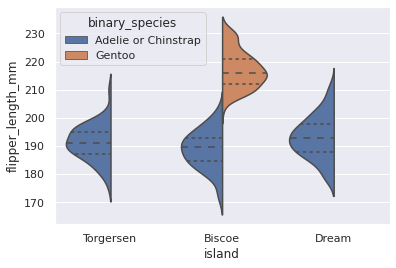

In [136]:
sns.violinplot(x='island',y='flipper_length_mm',hue='binary_species',split=True,inner='quartile',data=p);

###Faceted Plotting

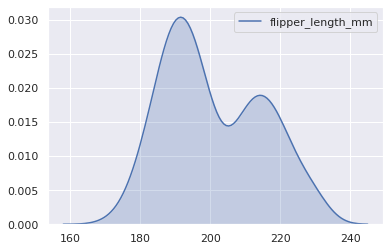

In [137]:
sns.kdeplot(p.flipper_length_mm,shade=True);

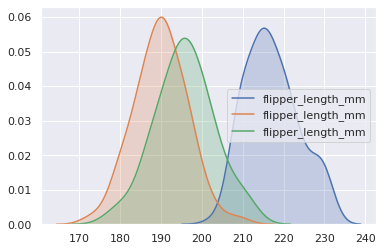

In [138]:
sns.kdeplot(p[p.species =='Gentoo'].flipper_length_mm,shade=True);
sns.kdeplot(p[p.species =='Adelie'].flipper_length_mm,shade=True);
sns.kdeplot(p[p.species =='Chinstrap'].flipper_length_mm,shade=True);


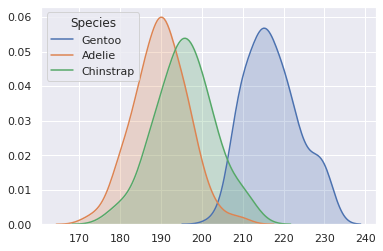

In [139]:
sns.kdeplot(p[p.species =='Gentoo'].flipper_length_mm,shade=True);
sns.kdeplot(p[p.species =='Adelie'].flipper_length_mm,shade=True);
sns.kdeplot(p[p.species =='Chinstrap'].flipper_length_mm,shade=True);
plt.legend(title='Species',labels=['Gentoo','Adelie','Chinstrap']);

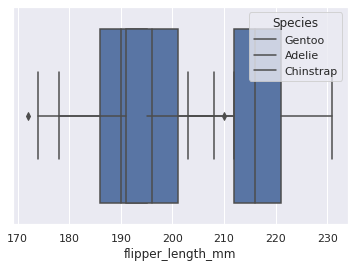

In [140]:
sns.boxplot(p[p.species =='Gentoo'].flipper_length_mm);
sns.boxplot(p[p.species =='Adelie'].flipper_length_mm);
sns.boxplot(p[p.species =='Chinstrap'].flipper_length_mm);
plt.legend(title='Species',labels=['Gentoo','Adelie','Chinstrap']);

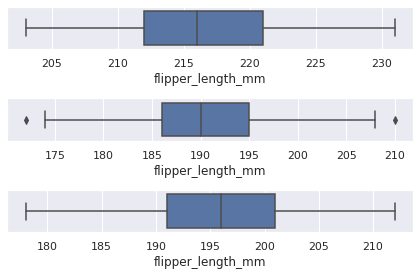

In [141]:
fig,axs=plt.subplots(nrows=3)
sns.boxplot(p[p.species =='Gentoo'].flipper_length_mm,ax=axs[0]);
sns.boxplot(p[p.species =='Adelie'].flipper_length_mm,ax=axs[1]);
sns.boxplot(p[p.species =='Chinstrap'].flipper_length_mm,ax=axs[2]);
plt.tight_layout()

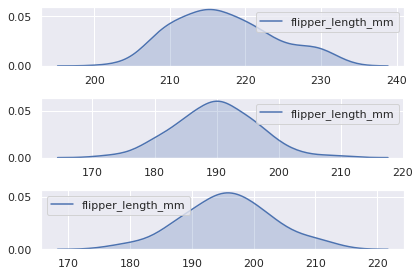

In [142]:
fig,axs=plt.subplots(nrows=3)
sns.kdeplot(p[p.species =='Gentoo'].flipper_length_mm,shade=True,ax=axs[0]);
sns.kdeplot(p[p.species =='Adelie'].flipper_length_mm,shade=True,ax=axs[1]);
sns.kdeplot(p[p.species =='Chinstrap'].flipper_length_mm,shade=True,ax=axs[2]);
plt.tight_layout()
#plt.legend(title='Species',labels=['Gentoo','Adelie','Chinstrap']);

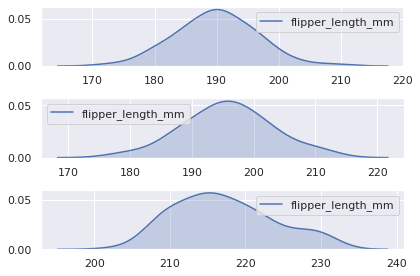

In [143]:
column_name = 'species'
num_rows = len(p[column_name].unique())
fig,axs=plt.subplots(nrows=num_rows)
i =0
for c_v in p[column_name].unique():
    sns.kdeplot(p[p[column_name] ==c_v].flipper_length_mm,shade=True,ax=axs[i]);
    i+=1
plt.tight_layout()


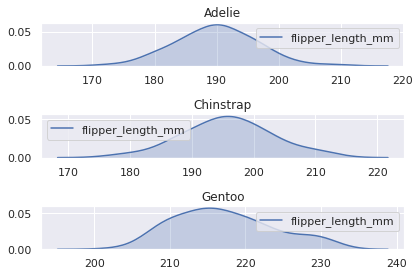

In [144]:
column_name = 'species'
num_rows = len(p[column_name].unique())
fig,axs=plt.subplots(nrows=num_rows)
i =0
for c_v in p[column_name].unique():
    pl=sns.kdeplot(p[p[column_name] ==c_v].flipper_length_mm,shade=True,ax=axs[i]);
    pl.set_title(c_v)
    i+=1
plt.tight_layout()

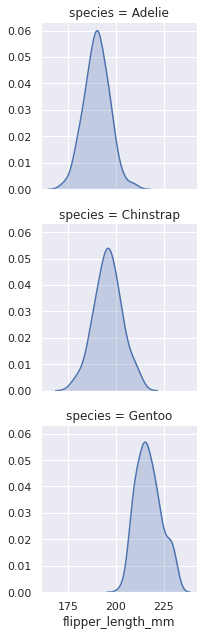

In [145]:
g=sns.FacetGrid(p,row='species')
g.map(sns.kdeplot,'flipper_length_mm',shade=True);

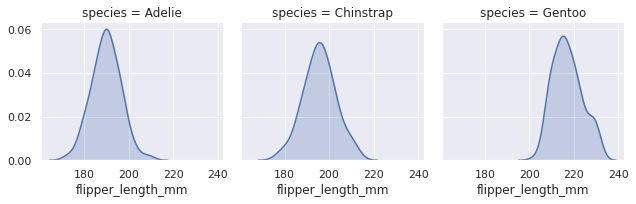

In [146]:
g=sns.FacetGrid(p,col='species')
g.map(sns.kdeplot,'flipper_length_mm',shade=True);

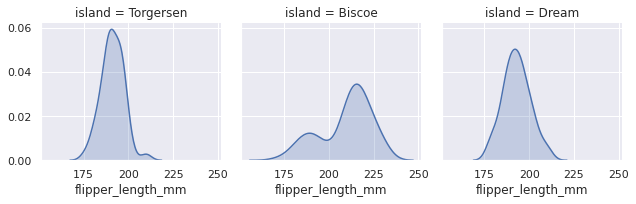

In [147]:
g=sns.FacetGrid(p,col='island')
g.map(sns.kdeplot,'flipper_length_mm',shade=True);

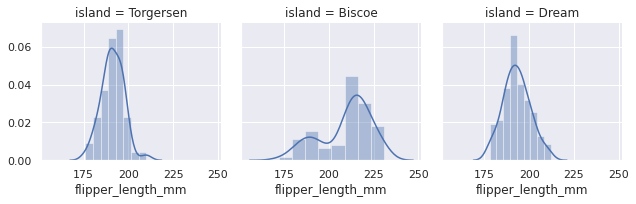

In [148]:
g=sns.FacetGrid(p,col='island')
g.map(sns.distplot,'flipper_length_mm');

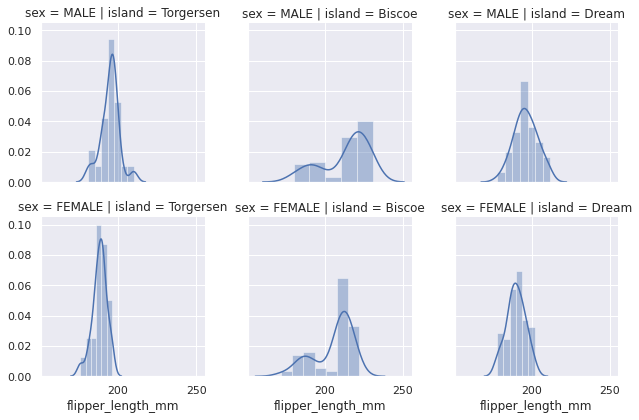

In [149]:
g=sns.FacetGrid(p,col='island',row='sex')
g.map(sns.distplot,'flipper_length_mm');

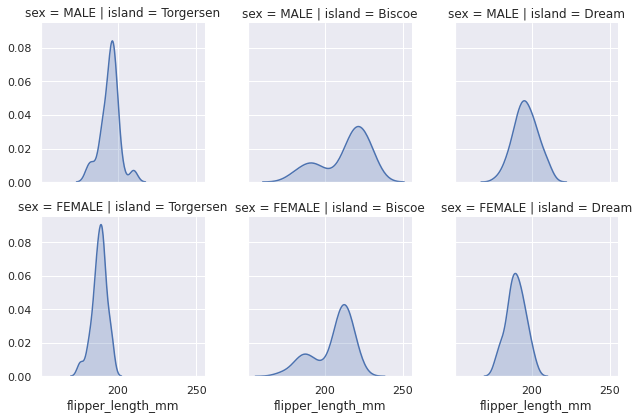

In [150]:
g=sns.FacetGrid(p,col='island',row='sex')
g.map(sns.kdeplot,'flipper_length_mm',shade=True);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


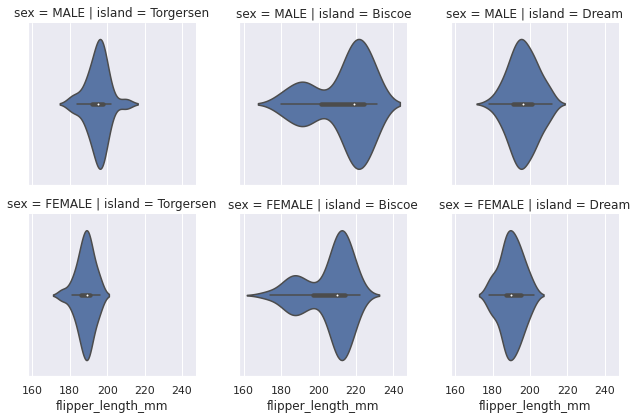

In [151]:
g=sns.FacetGrid(p,col='island',row='sex')
g.map(sns.violinplot,'flipper_length_mm');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


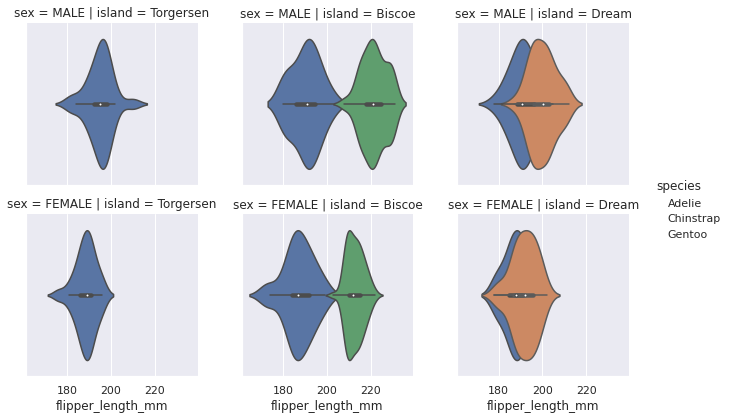

In [152]:
g=sns.FacetGrid(p,col='island',row='sex',hue='species')
g.map(sns.violinplot,'flipper_length_mm');
g.add_legend();

###Pair Plot


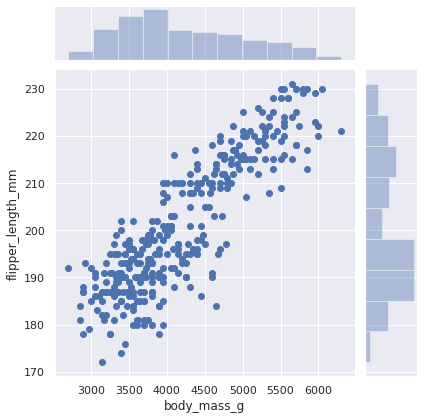

In [153]:
sns.jointplot(p.body_mass_g,p.flipper_length_mm)

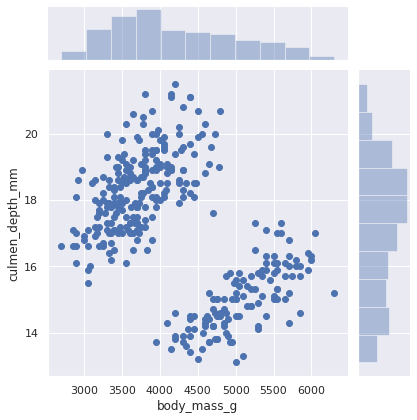

In [154]:
sns.jointplot(p.body_mass_g,p.culmen_depth_mm)

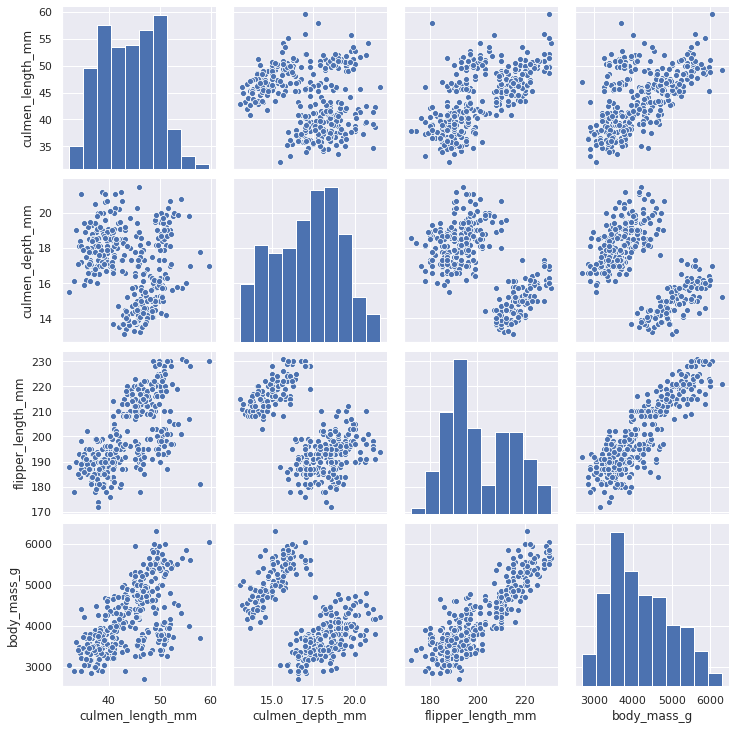

In [155]:
sns.pairplot(p);

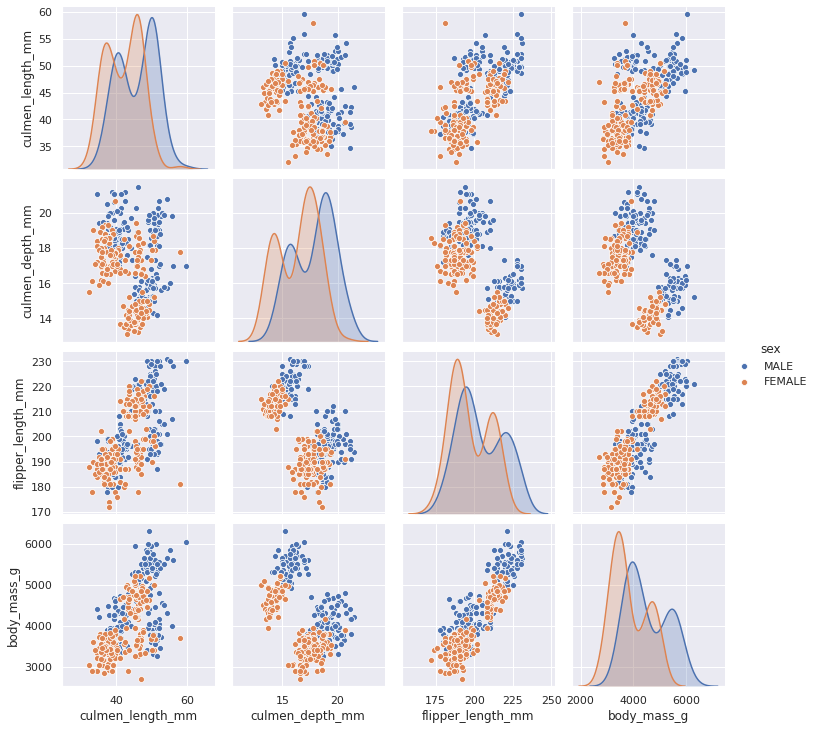

In [156]:
sns.pairplot(p,hue='sex');

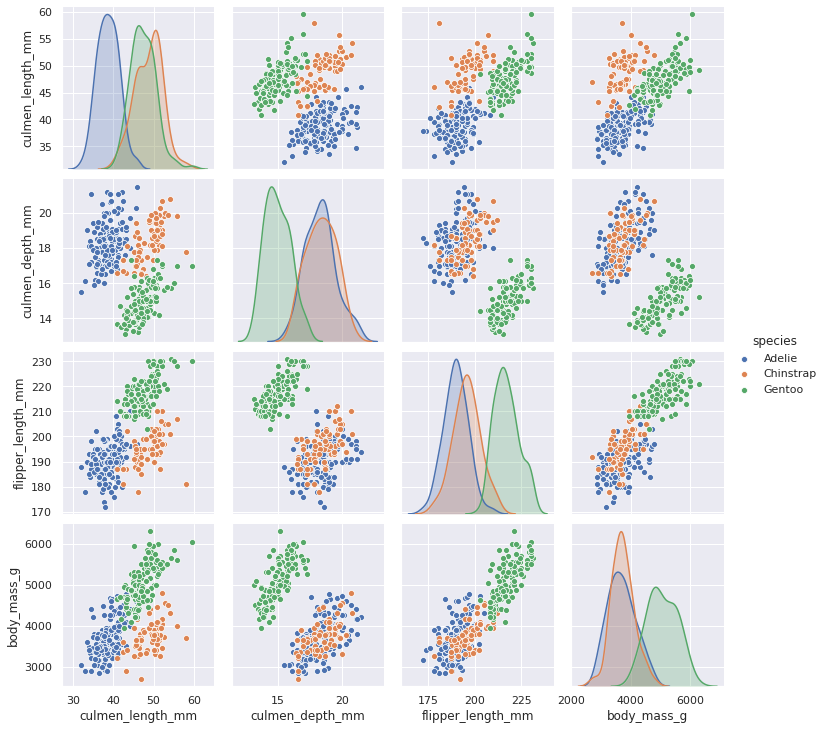

In [157]:
sns.pairplot(p,hue='species');

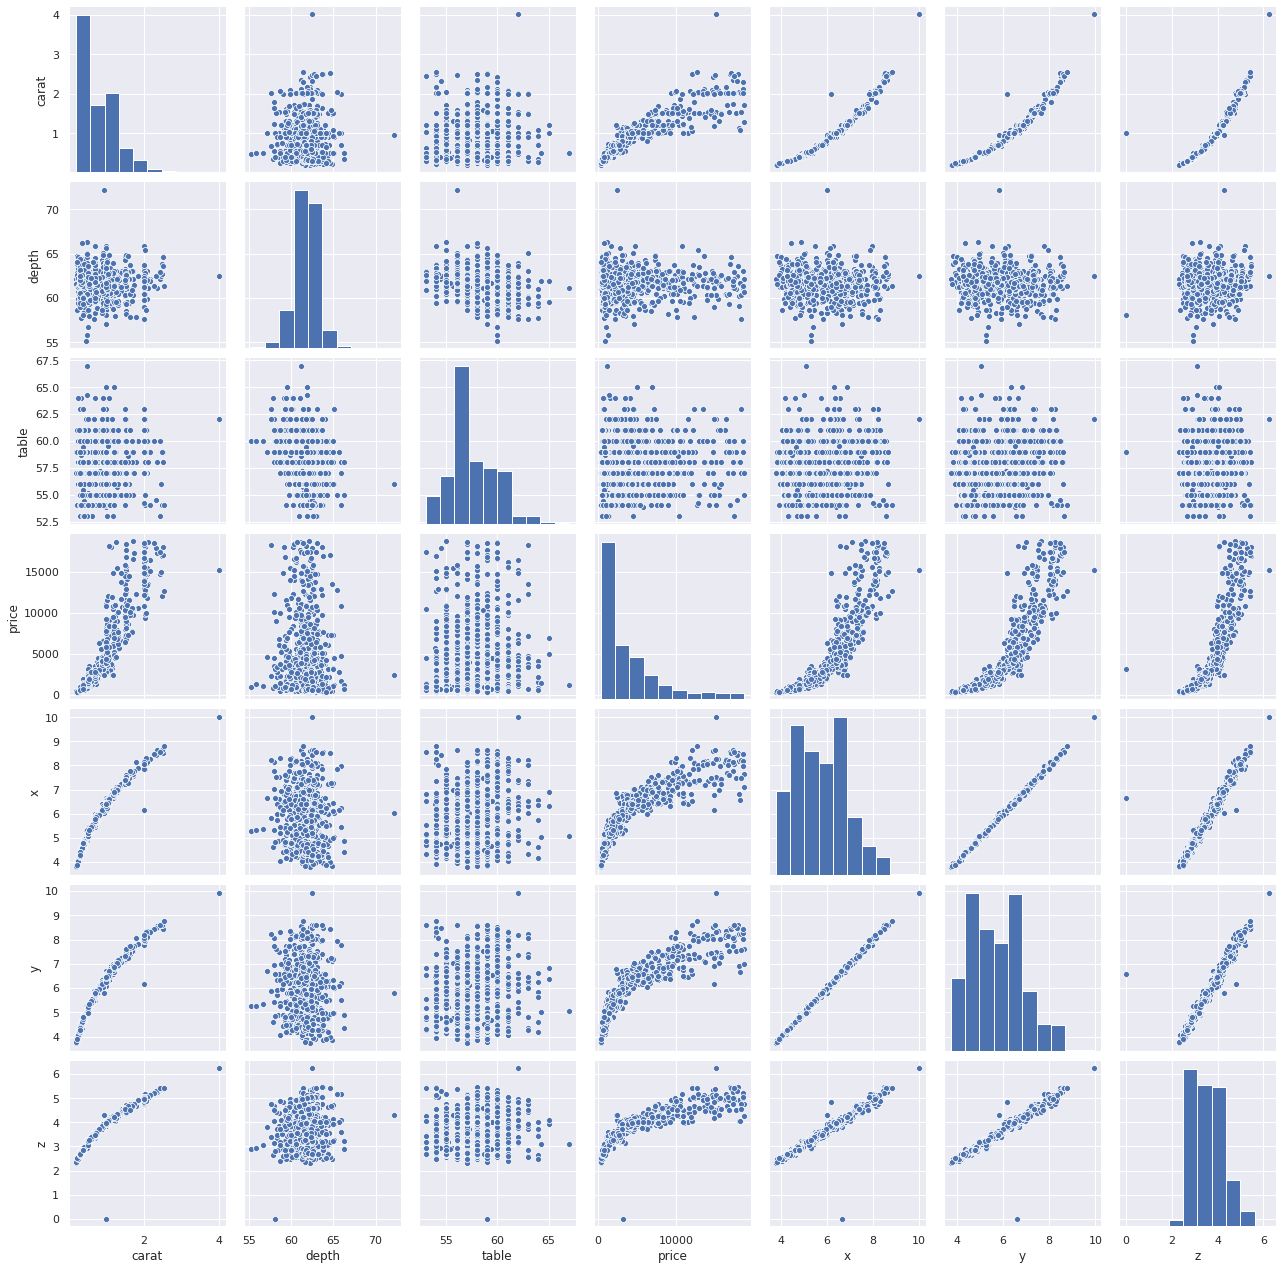

In [158]:
sns.pairplot(d.sample(1000));

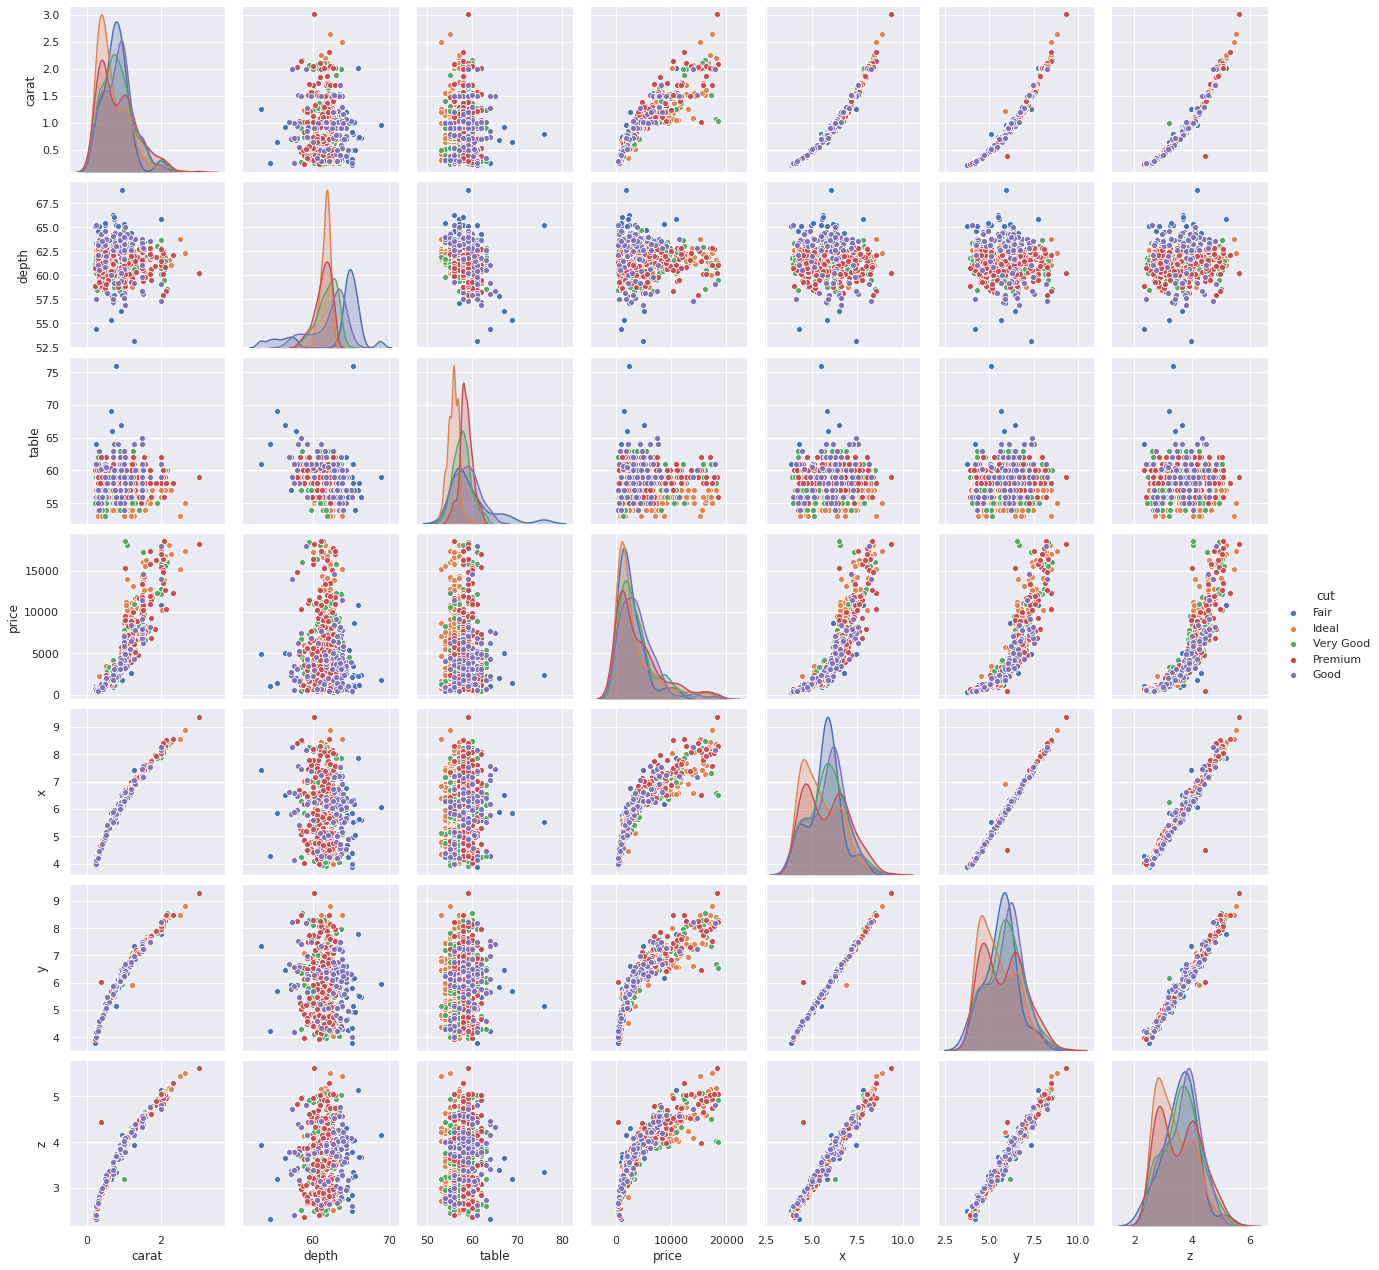

In [159]:
sns.pairplot(d.sample(1000),hue='cut');

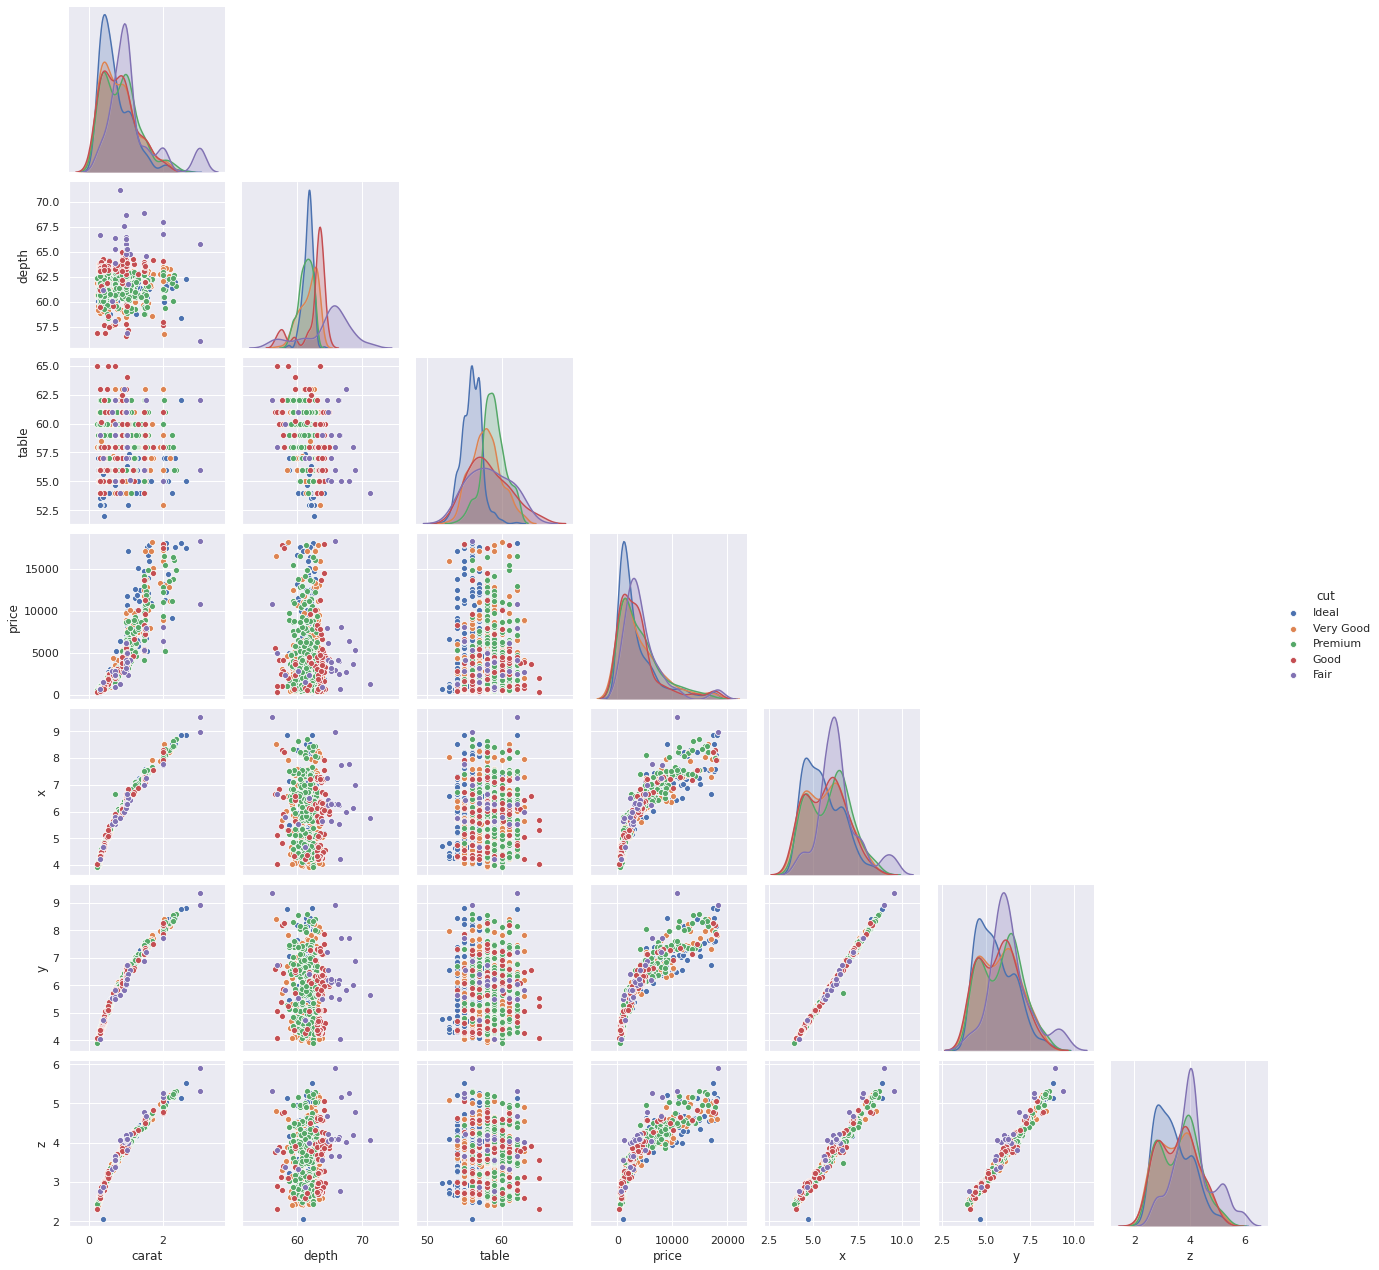

In [160]:
sns.pairplot(d.sample(1000),hue='cut',corner=True);

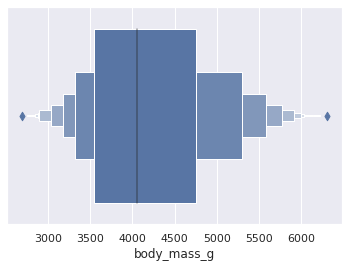

In [161]:
sns.boxenplot(p.body_mass_g);